In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\HP\Desktop\code\Mall_Customers.csv')

In [3]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# EDA

In [4]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display information about the dataset
print("\nInformation about the dataset:")
print(df.info())

# Display the shape of the dataset
print("\nShape of the dataset:")
print(df.shape)

# Display descriptive statistics of the dataset

print(df.describe())



First few rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7

In [5]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Correlational graph

C:\Users\HP\AppData\Local\Temp\ipykernel_5056\3800414336.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm')


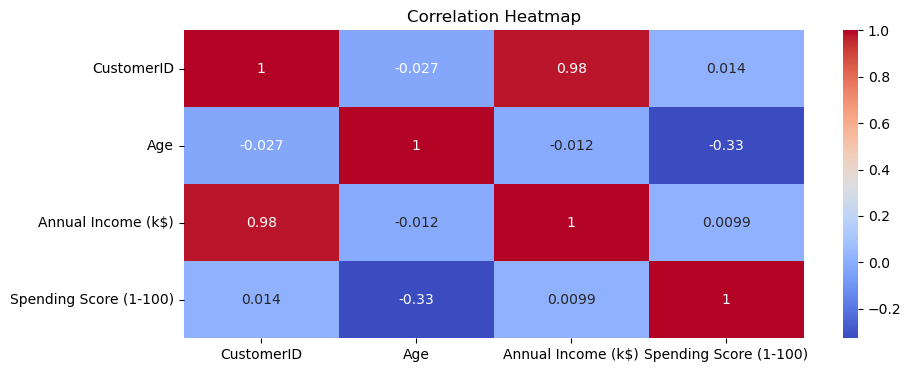

In [6]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17
...,...,...,...,...
195,196,Female,35,120
196,197,Female,45,126
197,198,Male,32,126
198,199,Male,32,137


In [9]:
df['Gender'].replace({'Male':'0','Female':'1'},inplace=True)

In [10]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [16]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [17]:
from sklearn.model_selection import train_test_split
x = df.drop(['Spending Score (1-100)'], axis=1)
y = df['Spending Score (1-100)']

In [18]:
x

,CustomerID,Gender,Age,Annual Income (k$)
0,1,0,19,15
1,2,0,21,15
2,3,1,20,16
3,4,1,23,16
4,5,1,31,17
...,...,...,...,...
195,196,1,35,120
196,197,1,45,126
197,198,0,32,126
198,199,0,32,137


In [19]:
y

0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=100)

In [22]:
# Feature Scaling
# We do scaling of data for balancing the data points.
from sklearn.preprocessing import StandardScaler
stand= StandardScaler()
Fit = stand.fit(x_train)
x_train = Fit.transform(x_train)
x_test = Fit.transform(x_test)

In [23]:
#Sanity check for the sampled data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(160, 4)
(160,)
(40, 4)
(40,)


In [24]:
y_test

126    35
104    56
99     49
92     49
111    54
167    95
116    43
96     47
52     54
69     47
164    26
124    29
182    15
154    16
125    77
196    28
194    16
177    69
163    93
31     73
11     99
73     56
15     79
41     92
97     50
128    11
133    71
82     41
139    72
123    91
83     44
65     59
151    88
162     5
170    13
77     48
32      4
173    92
174    13
85     46
Name: Spending Score (1-100), dtype: int64

In [25]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Creating the model on Training Data
lr=lr.fit(x_train,y_train)
prediction=lr.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value for Train_df:',metrics.r2_score(y_train, lr.predict(x_train)))
print('R2 Value for Test_df:',metrics.r2_score(y_test,prediction))
print('MSE Values for Train_df:',metrics.mean_squared_error(y_train, lr.predict(x_train)))
print('MSE Values for Test_df:',metrics.mean_squared_error(y_test, prediction))

R2 Value for Train_df: 0.10400359428595307
R2 Value for Test_df: 0.09351631396746185
MSE Values for Train_df: 573.1288258960359
MSE Values for Test_df: 687.0324839286172


In [26]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5)
# Creating the model on Training Data
dt=dt.fit(x_train,y_train)
prediction=dt.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value for Train_df:',metrics.r2_score(y_train, dt.predict(x_train)))
print('R2 Value for Test_df:',metrics.r2_score(y_test,prediction))
print('MSE Values for Train_df:',metrics.mean_squared_error(y_train, dt.predict(x_train)))
print('MSE Values for Test_df:',metrics.mean_squared_error(y_test, prediction))

R2 Value for Train_df: 0.7324698046491473
R2 Value for Test_df: -0.22590346885907886
MSE Values for Train_df: 171.12710025993744
MSE Values for Test_df: 929.1237318933165


In [27]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
# Creating the model on Training Data
knn=knn.fit(x_train,y_train)
prediction=knn.predict(x_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value for Train_df:',metrics.r2_score(y_train, knn.predict(x_train)))
print('R2 Value for Test_df:',metrics.r2_score(y_test,prediction))
print('MSE Values for Train_df:',metrics.mean_squared_error(y_train, knn.predict(x_train)))
print('MSE Values for Test_df:',metrics.mean_squared_error(y_test, prediction))

R2 Value for Train_df: 0.4524324045391881
R2 Value for Test_df: 0.3902608738676705
MSE Values for Train_df: 350.25450000000006
MSE Values for Test_df: 462.12700000000007
